In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

DataFrame[a: bigint, b: double, c: string, d: date, e: timestamp]

In [3]:
onlinedata = spark.read.format('csv').option('header', 'true').load('onlineshopping.csv')

onlinedata.createOrReplaceTempView('online')
onlinedata.show()

+----------+------+-------------+-------------+--------------+-------------------+--------------+--------------------+----------------+--------+---------+----------------+-------------+---+---------+-------------+------------+-----+-----------+------------+
|CustomerID|Gender|     Location|Tenure_Months|Transaction_ID|   Transaction_Date|   Product_SKU| Product_Description|Product_Category|Quantity|Avg_Price|Delivery_Charges|Coupon_Status|GST|     Date|Offline_Spend|Online_Spend|Month|Coupon_Code|Discount_pct|
+----------+------+-------------+-------------+--------------+-------------------+--------------+--------------------+----------------+--------+---------+----------------+-------------+---+---------+-------------+------------+-----+-----------+------------+
|     13408|     M|      Chicago|           30|         16860|2019-01-03 00:00:00|GGOENEBB081499|Nest Cam Indoor S...|     Nest-Canada|       1|   153.71|             8.7|      Clicked|0.1| 1/3/2019|         4500|     1576.38|

In [13]:
#GOAL-01:Explore customer spend online versus offline by geography
spark.sql("SELECT Location,SUM(CASE WHEN Online_Spend > 0 THEN Online_Spend ELSE 0 END) AS Total_Online_Spend,SUM(CASE WHEN Offline_Spend > 0 THEN Offline_Spend ELSE 0 END) AS Total_Offline_Spend FROM online GROUP BY Location").show();


+-------------+-------------------+-------------------+
|     Location| Total_Online_Spend|Total_Offline_Spend|
+-------------+-------------------+-------------------+
|      Chicago|3.256604170999903E7|          4.89985E7|
|   New Jersey|  8027488.979999971|          1.14347E7|
|Washington DC|  4265284.629999993|          6546400.0|
|   California|2.739661630999962E7|          4.18946E7|
|     New York|1.978208290999972E7|          2.79016E7|
+-------------+-------------------+-------------------+



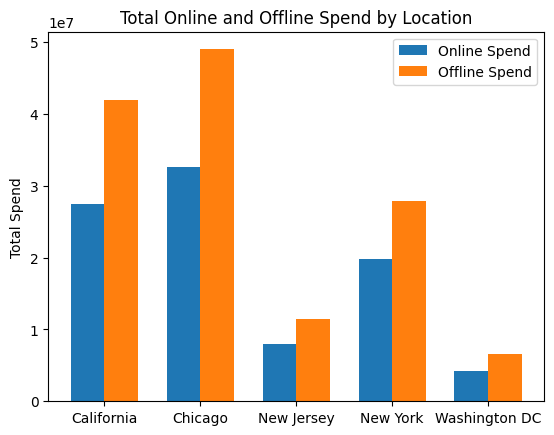

In [14]:
import matplotlib.pyplot as plt
import pandas as pd


csv_file = 'onlineshopping.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file)

# Group by Location and calculate total online and offline spends
grouped_data = df.groupby('Location').agg({'Online_Spend': 'sum', 'Offline_Spend': 'sum'}).reset_index()

# Plotting the bar chart
fig, ax = plt.subplots()

bar_width = 0.35
bar_locations = range(len(grouped_data['Location']))

bar1 = ax.bar(bar_locations, grouped_data['Online_Spend'], bar_width, label='Online Spend')
bar2 = ax.bar([p + bar_width for p in bar_locations], grouped_data['Offline_Spend'], bar_width, label='Offline Spend')

ax.set_xticks([p + bar_width / 2 for p in bar_locations])
ax.set_xticklabels(grouped_data['Location'])
ax.set_ylabel('Total Spend')
ax.set_title('Total Online and Offline Spend by Location')
ax.legend()

plt.show()


In [15]:
#GOAL-02: Explore customer spend pattern based on customer tenure
spark.sql("SELECT Tenure_Months,SUM(CASE WHEN Online_Spend > 0 THEN Online_Spend ELSE 0 END) AS Total_Online_Spend, SUM(CASE WHEN Offline_Spend > 0 THEN Offline_Spend ELSE 0 END) AS Total_Offline_Spend FROM online GROUP BY  Tenure_Months ORDER BY Tenure_Months").show()


+-------------+------------------+-------------------+
|Tenure_Months|Total_Online_Spend|Total_Offline_Spend|
+-------------+------------------+-------------------+
|           10| 2577891.840000015|          3569000.0|
|           11|1717098.2499999972|          2648000.0|
|           12|        1078029.31|          1548400.0|
|           13|1701416.9599999993|          2629700.0|
|           14|1528944.8599999985|          2180500.0|
|           15|1131411.0000000014|          1518700.0|
|           16|1889581.7699999937|          2947500.0|
|           17|1405870.1799999957|          2265200.0|
|           18|1383293.5499999982|          2118500.0|
|           19| 2534514.490000006|          3299500.0|
|            2|1179043.2500000014|          1769000.0|
|           20|1603577.6499999966|          2513200.0|
|           21| 2792397.670000025|          3676500.0|
|           22| 2047348.999999999|          3016000.0|
|           23|1567347.8000000012|          2362000.0|
|         

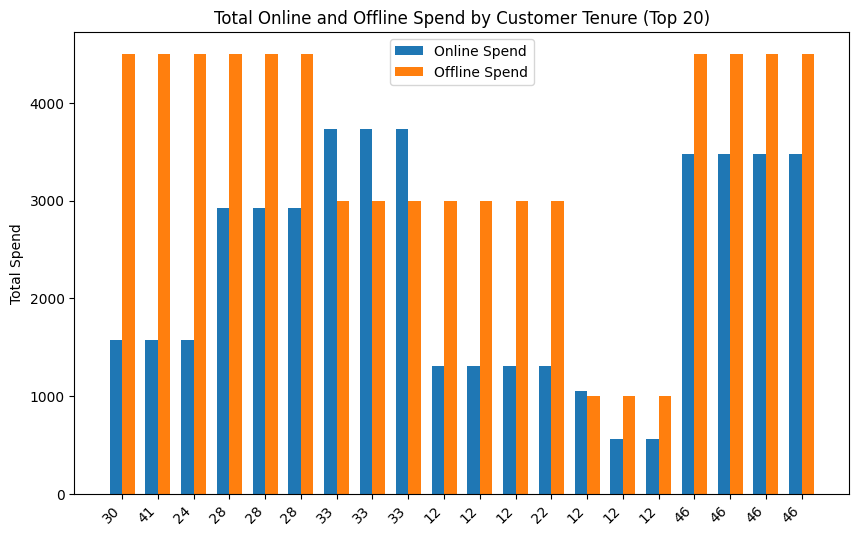

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your CSV file is named 'customer_spend_data.csv'
csv_file = 'onlineshopping.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file)

# Select only the top 20 rows
df_top20 = df.head(20)

# Plotting the data for the top 20 rows
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
bar_locations = range(len(df_top20['Tenure_Months']))

bar1 = ax.bar(bar_locations, df_top20['Online_Spend'], bar_width, label='Online Spend')
bar2 = ax.bar([p + bar_width for p in bar_locations], df_top20['Offline_Spend'], bar_width, label='Offline Spend')
plt.xticks(rotation=45, ha='right')
ax.set_xticks([p + bar_width / 2 for p in bar_locations])
ax.set_xticklabels(df_top20['Tenure_Months'])
ax.set_ylabel('Total Spend')
ax.set_title('Total Online and Offline Spend by Customer Tenure (Top 20)')
ax.legend()

plt.show()


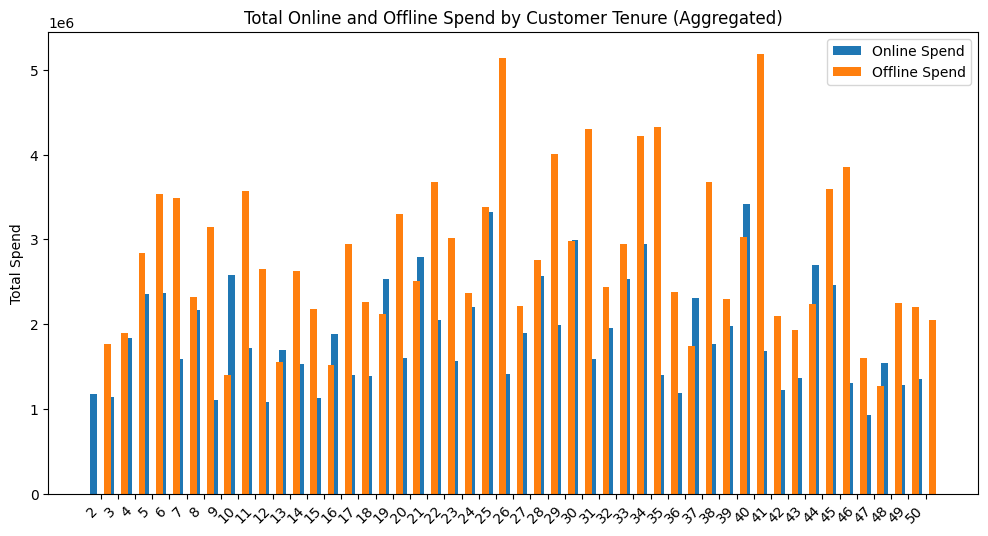

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your CSV file is named 'customer_spend_data.csv'
csv_file = 'onlineshopping.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file)

# Group by 'Tenure_Months' and sum the values
df_aggregated = df.groupby('Tenure_Months').sum().reset_index()

# Plotting the aggregated data with increased space between bars
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust the figsize if needed

bar_width = 0.4  # Adjusted bar width
bar_gap = 0.4  # Additional gap between groups

bar_locations = range(len(df_aggregated['Tenure_Months']))

bar1 = ax.bar(bar_locations, df_aggregated['Online_Spend'], bar_width, label='Online Spend')
bar2 = ax.bar([p + bar_width + bar_gap for p in bar_locations], df_aggregated['Offline_Spend'], bar_width, label='Offline Spend')
plt.xticks(rotation=45, ha='right')
ax.set_xticks([p + (bar_width + bar_gap) / 2 for p in bar_locations])
ax.set_xticklabels(df_aggregated['Tenure_Months'])
ax.set_ylabel('Total Spend')
ax.set_title('Total Online and Offline Spend by Customer Tenure (Aggregated)')
ax.legend()

plt.show()


In [31]:
#goal03:Understand the use of coupon codes of customers based on the tenure
#This query counts the number of transactions where customers used coupon codes, grouped by tenure.
spark.sql("SELECT Tenure_Months, COUNT(*) AS CouponTransactions FROM online WHERE Coupon_Status = 'Used' GROUP BY Tenure_Months").show()



+-------------+------------------+
|Tenure_Months|CouponTransactions|
+-------------+------------------+
|            7|               247|
|           15|               201|
|           11|               289|
|           29|               347|
|           42|               203|
|            3|               211|
|           30|               531|
|           34|               527|
|            8|               364|
|           28|               465|
|           22|               337|
|           16|               333|
|           35|               275|
|           47|               188|
|           43|               235|
|            5|               455|
|           31|               284|
|           18|               266|
|           27|               351|
|           17|               265|
+-------------+------------------+
only showing top 20 rows



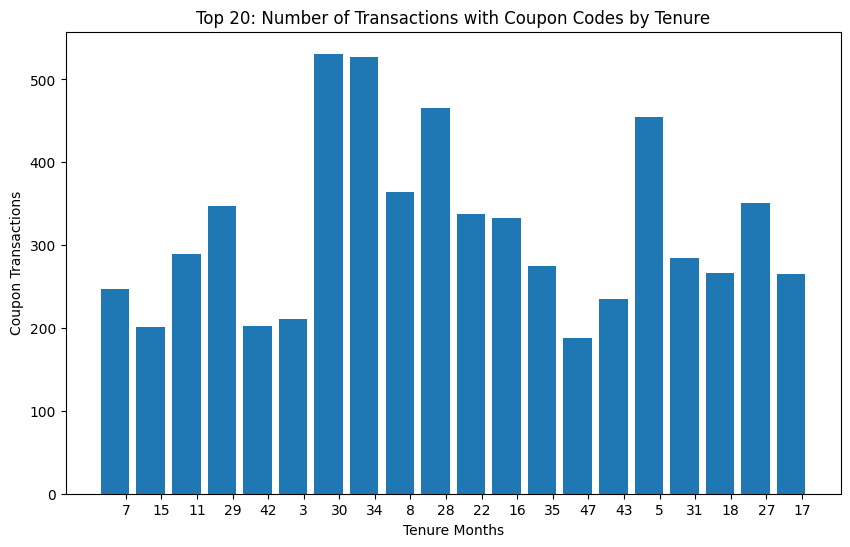

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

# Execute the Spark SQL query and collect the results into a Pandas DataFrame
result_df = spark.sql("SELECT Tenure_Months, COUNT(*) AS CouponTransactions FROM online WHERE Coupon_Status = 'Used' GROUP BY Tenure_Months").toPandas()

# Select only the top 20 records
result_top20 = result_df.head(20)

# Plotting the top 20 results with increased space and bar width
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figsize if needed

bar_width = 0.8  # Adjusted bar width
bar_gap = 0.2  # Additional gap between bars

bar_locations = range(len(result_top20['Tenure_Months']))

plt.bar([p + bar_gap for p in bar_locations], result_top20['CouponTransactions'], bar_width)
plt.xlabel('Tenure Months')
plt.ylabel('Coupon Transactions')
plt.title('Top 20: Number of Transactions with Coupon Codes by Tenure')
plt.xticks([p + (bar_width + bar_gap) / 2 for p in bar_locations], result_top20['Tenure_Months'])
plt.show()


In [38]:
#goal-04:. Product Category sales online by geography analysis
spark.sql("SELECT Product_Category, Location, SUM(Online_Spend) AS TotalOnlineSales FROM online GROUP BY Product_Category, Location").show()


+--------------------+-------------+------------------+
|    Product_Category|     Location|  TotalOnlineSales|
+--------------------+-------------+------------------+
|             Apparel|   California|  9535483.45000007|
|              Office|   California| 3215932.630000016|
|             Apparel|Washington DC|1539579.5199999986|
|Notebooks & Journals|   California|387095.98999999993|
|Notebooks & Journals|      Chicago|473002.94999999995|
|         Nest-Canada|     New York|         128795.28|
|              Office|   New Jersey| 897045.0900000003|
|            Headgear|   New Jersey|115005.37999999998|
|             Bottles|     New York|102275.19999999998|
|          Housewares|      Chicago| 89159.42000000001|
|             Bottles|      Chicago|146630.52000000002|
|                Waze|      Chicago|359316.80000000005|
|             Bottles|   New Jersey|          58785.75|
|         Accessories|Washington DC|          19497.23|
|             Android|      Chicago|          33

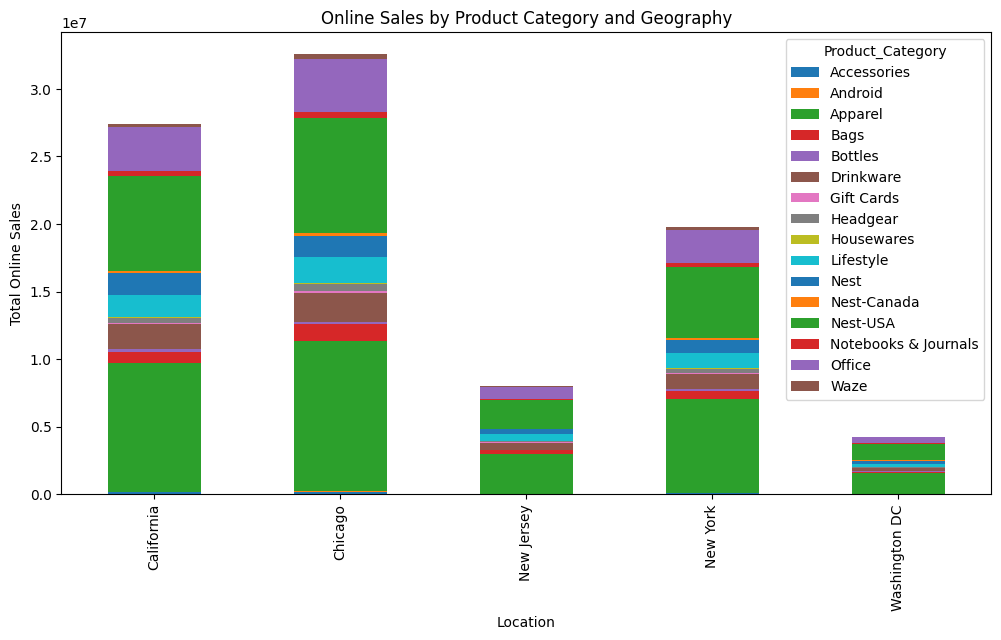

In [40]:
import matplotlib.pyplot as plt

# Execute the Spark SQL query
result_df = spark.sql("SELECT Product_Category, Location, SUM(Online_Spend) AS TotalOnlineSales FROM online GROUP BY Product_Category, Location").toPandas()

# Plotting the results
fig, ax = plt.subplots(figsize=(12, 6))
result_df.pivot(index='Location', columns='Product_Category', values='TotalOnlineSales').plot(kind='bar', stacked=True, ax=ax)

plt.xlabel('Location')
plt.ylabel('Total Online Sales')
plt.title('Online Sales by Product Category and Geography')
plt.show()


In [42]:
#goal-05:Exploring highest selling product category by month
from pyspark.sql import functions as F
result_df = spark.sql("SELECT Month, Product_Category, SUM(Online_Spend) AS TotalOnlineSales FROM online GROUP BY Month, Product_Category").groupBy("Month").agg(F.first("Product_Category").alias("HighestSellingCategory"), F.max("TotalOnlineSales").alias("MaxSales")).show()


+-----+----------------------+------------------+
|Month|HighestSellingCategory|          MaxSales|
+-----+----------------------+------------------+
|    1|               Android| 81556.67000000003|
|   10|                Office|2114603.7000000104|
|   11|                  Bags|3323581.6800000146|
|   12|           Accessories|3760974.1099999966|
|    2|           Nest-Canada|1985022.9599999909|
|    3|               Apparel|2206377.2600000273|
|    4|                Office| 3159555.970000031|
|    5|               Bottles| 3084854.860000007|
|    6|                  Waze| 2920593.689999967|
|    7|                  Bags|3738519.6499999994|
|    8|               Bottles| 5317340.859999885|
|    9|                  Bags|2570354.3400000297|
+-----+----------------------+------------------+



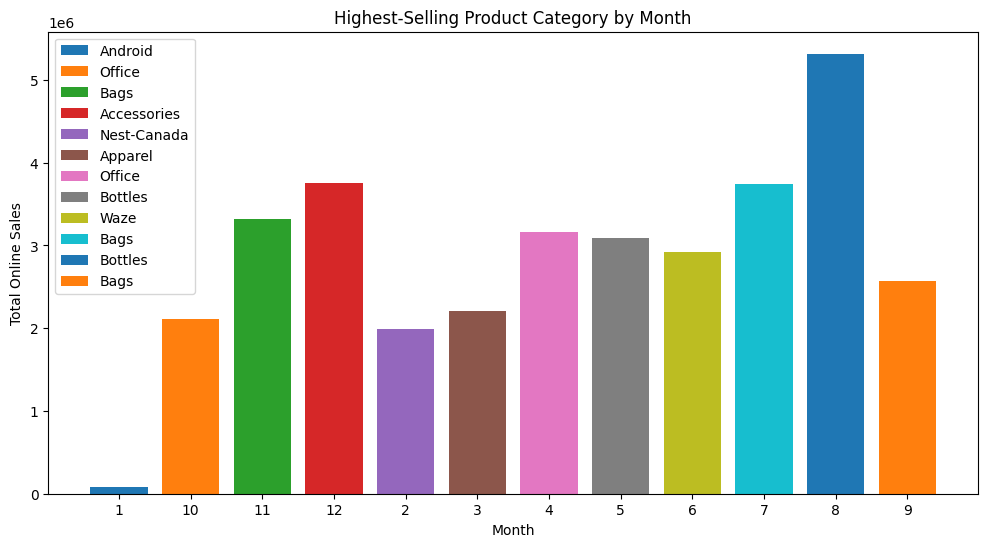

In [45]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'result_df' is your Spark DataFrame

# Execute the Spark SQL query
result_df = spark.sql("SELECT Month, Product_Category, SUM(Online_Spend) AS TotalOnlineSales FROM online GROUP BY Month, Product_Category").groupBy("Month").agg(F.first("Product_Category").alias("HighestSellingCategory"), F.max("TotalOnlineSales").alias("MaxSales"))
# Check if result_df is not None before converting to Pandas DataFrame
if result_df is not None:
    # Convert Spark DataFrame to Pandas DataFrame
    result_pandas = result_df.toPandas()

    # Plotting the results
    fig, ax = plt.subplots(figsize=(12, 6))

    # Bar plot for each month
    for month, group in result_pandas.groupby("Month"):
        ax.bar(month, group["MaxSales"].iloc[0], label=group["HighestSellingCategory"].iloc[0])

    plt.xlabel('Month')
    plt.ylabel('Total Online Sales')
    plt.title('Highest-Selling Product Category by Month')
    plt.legend()
    plt.show()
else:
    print("No results from the Spark SQL query.")


In [46]:
#goal-06:Exploring product category spend by genders
spark.sql("SELECT Gender, Product_Category, SUM(Online_Spend) AS TotalSpend FROM online GROUP BY Gender, Product_Category").show()


+------+--------------------+-------------------+
|Gender|    Product_Category|         TotalSpend|
+------+--------------------+-------------------+
|     F|         Nest-Canada|  397660.6900000002|
|     F|          Housewares|          130747.65|
|     F|Notebooks & Journals|  748771.7999999998|
|     M|            Headgear| 446160.94999999984|
|     F|           Drinkware|  3796577.600000019|
|     M|                Waze|  356294.2000000001|
|     F|              Office|  7189535.140000032|
|     F|         Accessories|  288994.0999999999|
|     M|           Lifestyle| 2009804.7999999968|
|     F|             Apparel|2.035001395999977E7|
|     F|            Headgear|  869049.1400000001|
|     F|           Lifestyle| 3393491.7800000138|
|     M|          Gift Cards|  67139.33000000002|
|     F|                Waze|          578694.26|
|     M|          Housewares|  93357.34000000003|
|     F|          Gift Cards| 242559.19999999984|
|     M|            Nest-USA|  8781007.640000038|


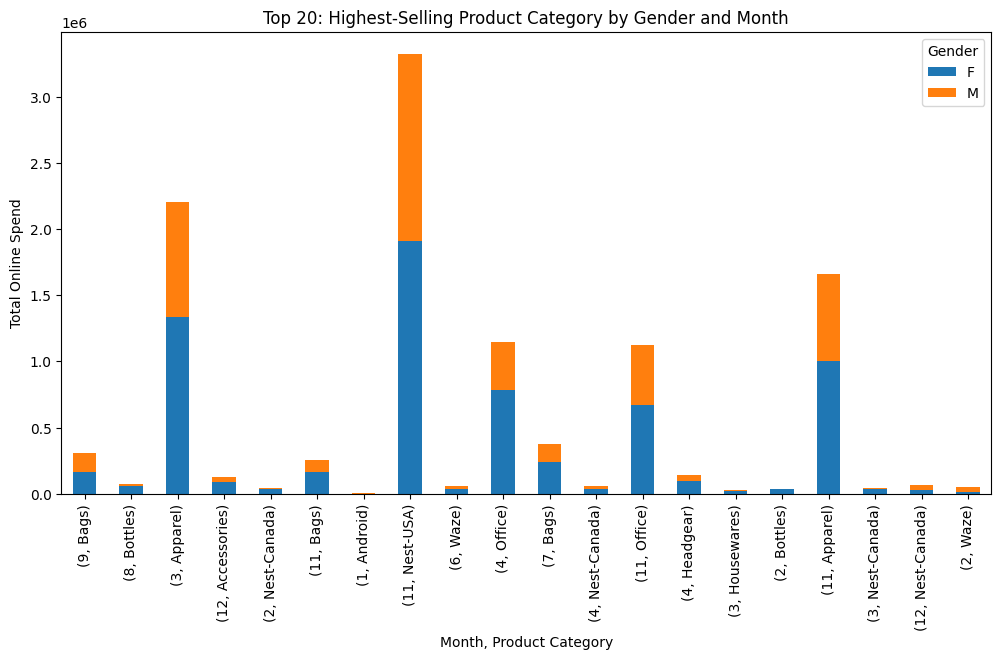

In [53]:
import matplotlib.pyplot as plt

# Execute the Spark SQL query
result_df = spark.sql("""
    SELECT
        Month,
        Product_Category,
        Gender,
        SUM(Online_Spend) AS TotalOnlineSales
    FROM online
    GROUP BY Month, Product_Category, Gender
""").groupBy("Month", "Product_Category").pivot("Gender").agg(F.sum("TotalOnlineSales").alias("TotalOnlineSales")).toPandas()

# Select only the top 20 rows
result_top20 = result_df.head(20)

# Plotting the results for the top 20 rows
fig, ax = plt.subplots(figsize=(12, 6))

# Bar plot for each month and product category, with separate bars for each gender
result_top20.set_index(['Month', 'Product_Category']).plot(kind='bar', ax=ax, stacked=True)

plt.xlabel('Month, Product Category')
plt.ylabel('Total Online Spend')
plt.title('Top 20: Highest-Selling Product Category by Gender and Month')
plt.legend(title='Gender')
plt.show()


In [59]:
#goal-07:Exploring online spend versus offline spend against genders
result_df = spark.sql("SELECT Gender, SUM(CASE WHEN Product_Category = 'Online' THEN Online_Spend ELSE Offline_Spend END) AS OnlineSpend, SUM(CASE WHEN Product_Category = 'Offline' THEN Offline_Spend ELSE Online_Spend END) AS OfflineSpend FROM online GROUP BY Gender").show()


+------+-----------+--------------------+
|Gender|OnlineSpend|        OfflineSpend|
+------+-----------+--------------------+
|     F|   8.7751E7|  5.85555039200006E7|
|     M|  4.90248E7|3.3482010619999312E7|
+------+-----------+--------------------+



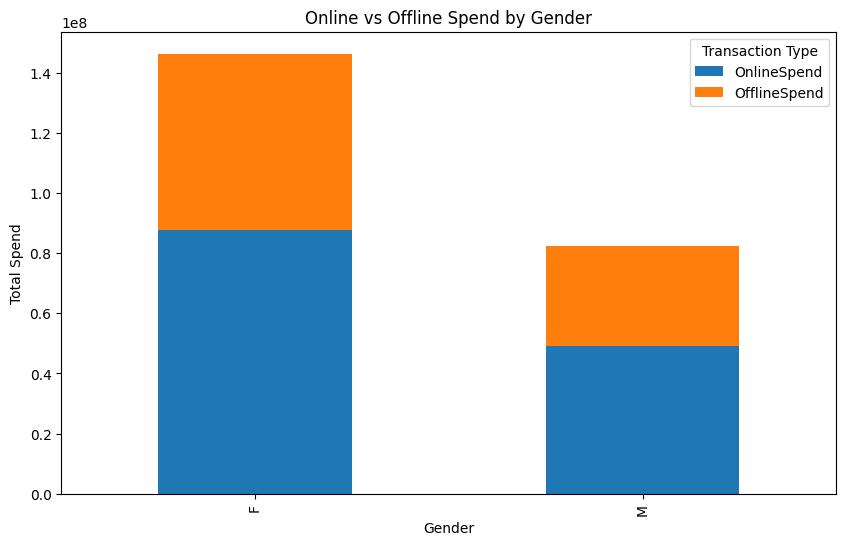

In [61]:
import matplotlib.pyplot as plt

# Execute the Spark SQL query and store the result in a Pandas DataFrame
result_df = spark.sql("SELECT Gender, SUM(CASE WHEN Product_Category = 'Online' THEN Online_Spend ELSE Offline_Spend END) AS OnlineSpend, SUM(CASE WHEN Product_Category = 'Offline' THEN Offline_Spend ELSE Online_Spend END) AS OfflineSpend FROM online GROUP BY Gender").toPandas()

# Check if the DataFrame is not None before proceeding with visualization
if result_df is not None:
    # Plotting the results
    fig, ax = plt.subplots(figsize=(10, 6))

    # Grouped bar plot for online and offline spend by gender
    result_df.set_index('Gender')[['OnlineSpend', 'OfflineSpend']].plot(kind='bar', ax=ax, stacked=True)

    plt.xlabel('Gender')
    plt.ylabel('Total Spend')
    plt.title('Online vs Offline Spend by Gender')
    plt.legend(title='Transaction Type')
    plt.show()
else:
    print("DataFrame is None. Check your Spark SQL query.")


In [12]:
#goal-08: Most selling item online per product category analysis
result_df = spark.sql("""
    SELECT
        Product_Category,
        FIRST(Product_Description) AS MostSellingItem,
        MAX(Online_Spend) AS MaxSales
    FROM online
    GROUP BY Product_Category
    ORDER BY Product_Category, MaxSales DESC
""").show()





+--------------------+--------------------+--------+
|    Product_Category|     MostSellingItem|MaxSales|
+--------------------+--------------------+--------+
|         Accessories|Android Small Rem...|  979.08|
|             Android|Android Men's Par...|  956.13|
|             Apparel|   YouTube Tee Black|  985.28|
|                Bags|Google Alpine Sty...|  985.28|
|             Bottles|22 oz Android Bottle|  985.28|
|           Drinkware|Google Thermal Bo...|  985.28|
|          Gift Cards|  Gift Card - $50.00|  899.05|
|            Headgear|Google Snapback N...|  985.28|
|          Housewares|SPF-15 Slim & Sle...|  981.86|
|           Lifestyle|      Windup Android|  985.28|
|                Nest|Nest Thermostat E...|  909.19|
|         Nest-Canada|Nest Cam Indoor S...|  993.69|
|            Nest-USA|Nest Learning The...|  985.28|
|Notebooks & Journals|YouTube Transmiss...|  985.28|
|              Office|Google Laptop and...|  985.28|
|                Waze|Waze Mobile Phone...|  9

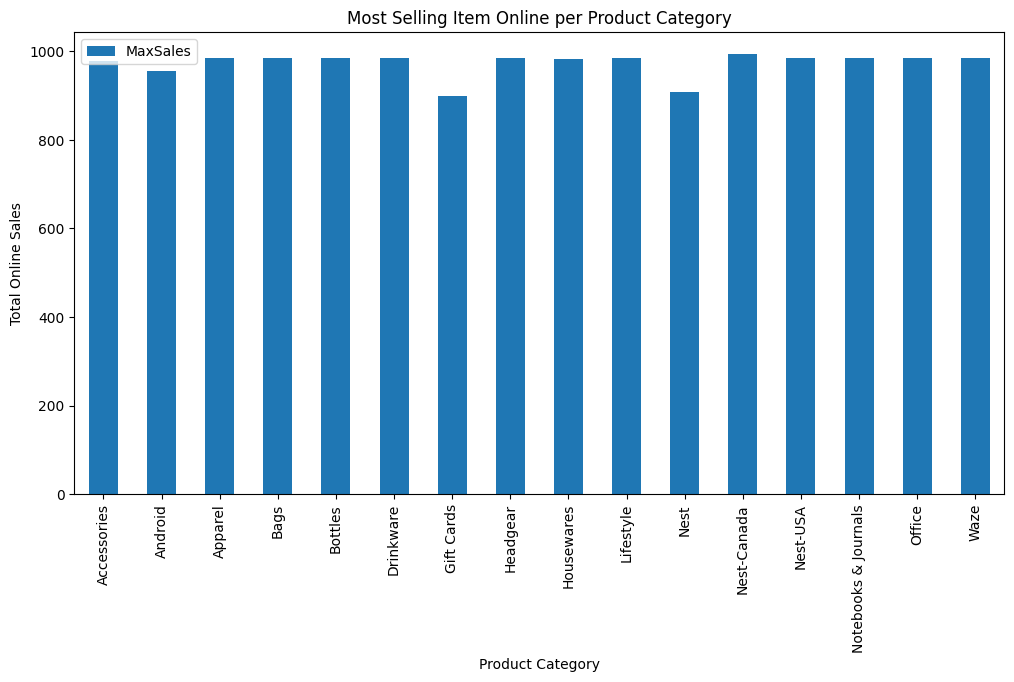

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'result_df' is your Pandas DataFrame with the query result
# If not, replace 'result_df' with the actual DataFrame variable

# Convert 'MaxSales' to numeric
result_df['MaxSales'] = pd.to_numeric(result_df['MaxSales'], errors='coerce')

# Plotting the results
fig, ax = plt.subplots(figsize=(12, 6))

# Bar plot for each product category
result_df.set_index('Product_Category').plot(kind='bar', ax=ax, y='MaxSales')

plt.xlabel('Product Category')
plt.ylabel('Total Online Sales')
plt.title('Most Selling Item Online per Product Category')
plt.show()


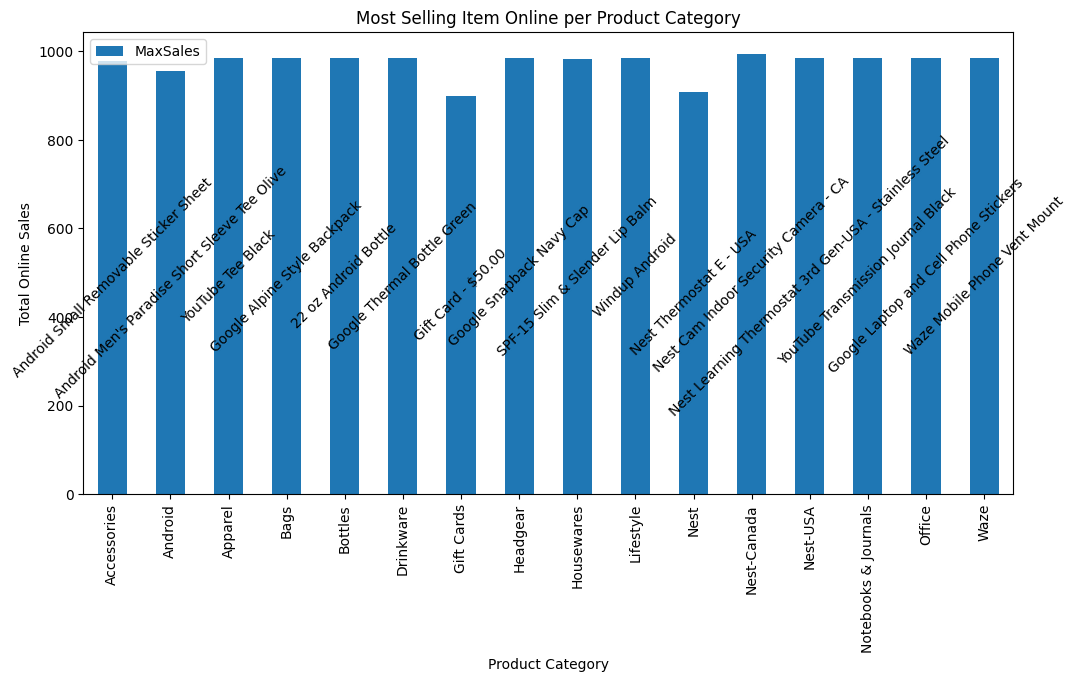

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'result_df' is your Pandas DataFrame with the query result
# If not, replace 'result_df' with the actual DataFrame variable

# Convert 'MaxSales' to numeric
result_df['MaxSales'] = pd.to_numeric(result_df['MaxSales'], errors='coerce')

# Plotting the results
fig, ax = plt.subplots(figsize=(12, 6))

# Bar plot for each product category
result_df.set_index('Product_Category').plot(kind='bar', ax=ax, y='MaxSales')

# Annotate each bar with the most selling item name inside the bar
for idx, value in enumerate(result_df['MostSellingItem']):
    ax.text(idx, result_df['MaxSales'].iloc[idx] / 2, str(value), ha='center', va='center', rotation=45)

plt.xlabel('Product Category')
plt.ylabel('Total Online Sales')
plt.title('Most Selling Item Online per Product Category')
plt.show()


In [25]:
#goal-09:Spread of item sales online in selected categories of the data (Ex: office, Lifestyle, apparel)

spark.sql("""
    SELECT
        Product_Category,
        Location,
        AVG(Online_Spend) AS AvgOnlineSales,
        MAX(Online_Spend) AS MaxOnlineSales,
        MIN(Online_Spend) AS MinOnlineSales,
        COUNT(*) AS NumberOfTransactions
    FROM online
    WHERE Product_Category IN ('Office', 'Lifestyle', 'Apparel')
    GROUP BY Product_Category, Location
""").show()


+----------------+-------------+------------------+--------------+--------------+--------------------+
|Product_Category|     Location|    AvgOnlineSales|MaxOnlineSales|MinOnlineSales|NumberOfTransactions|
+----------------+-------------+------------------+--------------+--------------+--------------------+
|         Apparel|   California|1854.7915677883816|        985.28|        1010.3|                5141|
|         Apparel|      Chicago|1877.4549374577446|        985.28|        1010.3|                5916|
|         Apparel|   New Jersey| 1870.778818998728|        985.28|       1079.34|                1558|
|         Apparel|     New York|1882.3934141689494|        985.28|        1010.3|                3670|
|         Apparel|Washington DC|1747.5363450624275|        985.28|       1019.59|                 881|
|       Lifestyle|   California|1836.8560379464273|        985.28|        1010.3|                 896|
|       Lifestyle|      Chicago|1870.4657581573867|        985.28|       

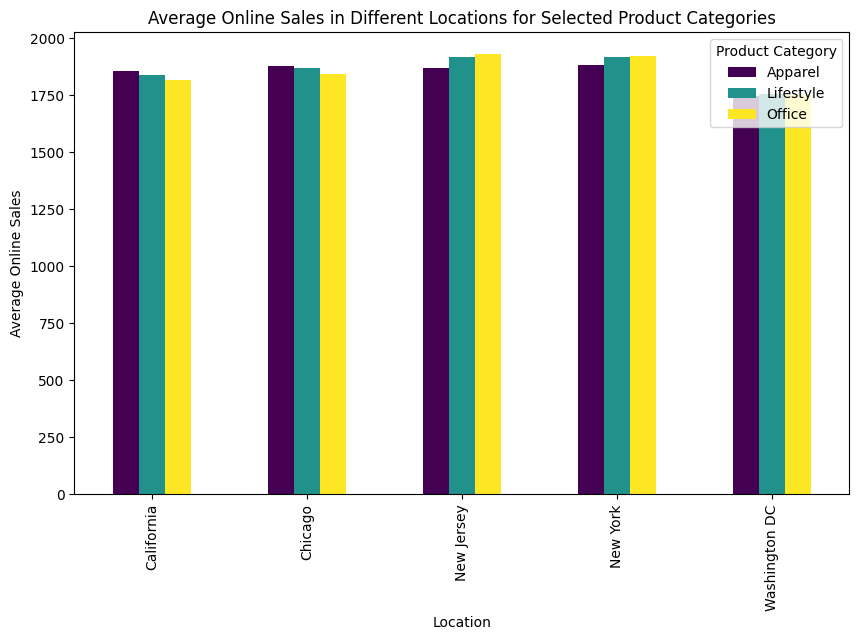

In [39]:
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession

# Assuming spark is your SparkSession
result = spark.sql("""
    SELECT
        Product_Category,
        CAST(Location AS STRING) AS Location,
        AVG(Online_Spend) AS AvgOnlineSales
    FROM online
    WHERE Product_Category IN ('Office', 'Lifestyle', 'Apparel')
    GROUP BY Product_Category, Location
""")

# Convert the Spark DataFrame to Pandas and plot
result.toPandas().pivot(index='Location', columns='Product_Category', values='AvgOnlineSales').plot(kind='bar', figsize=(10, 6), colormap='viridis')

plt.xlabel('Location')
plt.ylabel('Average Online Sales')
plt.title('Average Online Sales in Different Locations for Selected Product Categories')
plt.legend(title='Product Category')
plt.show()


In [55]:
#goal-10: Selling price ranges against deliver charges per product category analysis Impact of delivery charge as % against selling price
result = spark.sql("""
    SELECT
        Product_Category,
        SUM(Avg_Price) AS Total_Selling_Price,
        SUM(Delivery_Charges) AS Total_Delivery_Charges,
        (SUM(Delivery_Charges) / SUM(Avg_Price))  AS Delivery_Charge_Percentage
    FROM online
    GROUP BY Product_Category
""")

# Show the result
result.show()



+--------------------+-------------------+----------------------+--------------------------+
|    Product_Category|Total_Selling_Price|Total_Delivery_Charges|Delivery_Charge_Percentage|
+--------------------+-------------------+----------------------+--------------------------+
|          Housewares| 251.39000000000004|               2057.01|         8.182545049524643|
|              Office|  22273.90999999963|     82647.65000000017|          3.71051378047238|
|                Waze|  3303.900000000004|    4803.3099999999995|        1.4538303217409707|
|            Nest-USA| 1539237.5099999993|     89101.41999999991|      0.057886726006306816|
|                Bags| 52307.940000000795|    22582.479999999974|        0.4317218380230541|
|             Apparel|  330811.8499999956|    161334.25000000023|        0.4876918707718674|
|             Bottles|  921.1700000000005|    3504.9700000000003|        3.8049111456083007|
|            Headgear| 11130.929999999971|     6703.689999999996|     

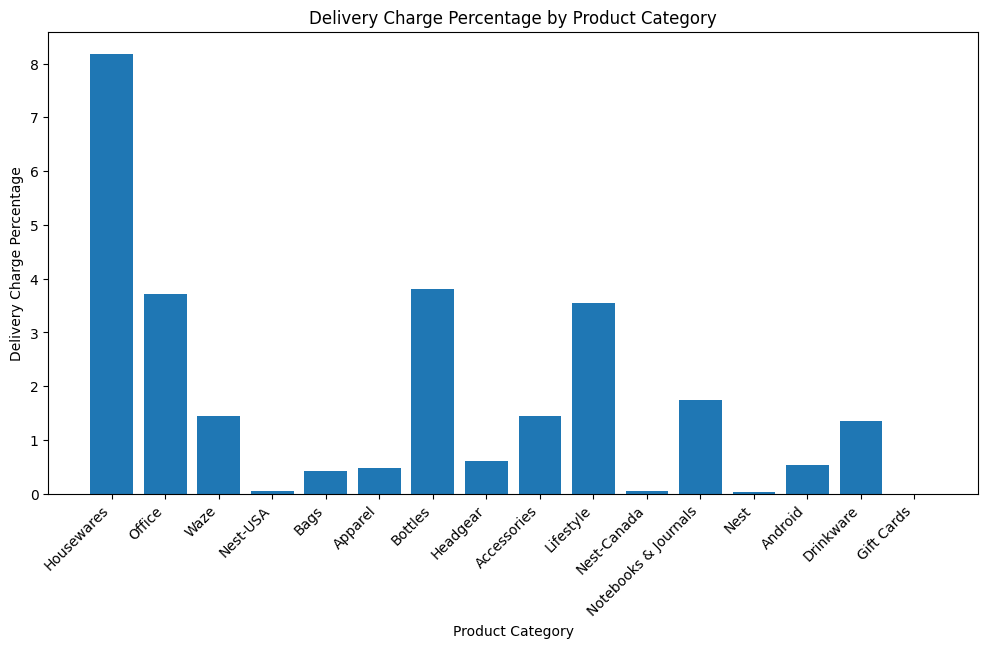

In [56]:
import matplotlib.pyplot as plt

# Convert PySpark DataFrame to Pandas DataFrame
result_pandas = result.toPandas()

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(result_pandas['Product_Category'], result_pandas['Delivery_Charge_Percentage'])
plt.xlabel('Product Category')
plt.ylabel('Delivery Charge Percentage')
plt.title('Delivery Charge Percentage by Product Category')
plt.xticks(rotation=45, ha='right')
plt.show()
